In [1]:
#import the required libraries.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

# 1. Load Data

In [2]:
# load CSV data into data frame.
df = pd.read_csv('Cars.csv')

# Check the first five rows of the data to see the overall data structure.
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
# Check the number of data records, potential features + one label
df.shape

(8128, 13)

In [4]:
# Check the column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


## 1.2 Converting data types

### There are some features that can be converted into numerical types.
- "CNG" and "LPG" will be removed because they use a different mileage system. other wise. their unit will cause problems.
- Drop torque column since the company doesn't understand this data.
- "kmpl” will be removed from the mileage column and convert the column to float type
- “CC” will be removed from the engine column and convert the column to float type
- “bhp” will be removed from the max power column and convert the column to float type

In [6]:
# remove "CNG" and "LPG"
CNG_and_LPG = np.logical_or(df['fuel'] == 'CNG', df['fuel'] == 'LPG')
df.drop(df[CNG_and_LPG].index, inplace=True)

# Drop the torque column
df.drop(['torque'],axis=1,inplace=True)

# remove “kmpl”
df['mileage'] = df.mileage.str.split(' ').str.get(0).astype(dtype='float')

# remove “CC”
df['engine'] = df.engine.str.split(' ').str.get(0).astype(dtype='float')

# remove “bhp”
df['max_power'] = df.max_power.str.split(' ').str.get(0).astype(dtype='float')

#### Also drop the record of 'Test Drive Car'. Since they have very high selling price.

In [7]:
df[df['owner'] == 'Test Drive Car']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
4383,Volkswagen Vento 1.5 TDI Highline BSIV,2019,1350000,5400,Diesel,Dealer,Manual,Test Drive Car,22.27,1498.0,108.60,5.0
4950,Audi A6 35 TFSI Matrix,2019,6223000,7800,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,187.74,5.0
4951,Audi A6 35 TFSI Matrix,2019,5923000,11500,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,187.74,5.0
4952,Audi A6 35 TFSI Matrix,2019,6523000,23600,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,187.74,5.0
6220,Honda Civic ZX,2019,2000000,24857,Petrol,Dealer,Automatic,Test Drive Car,16.50,1799.0,139.46,5.0


In [8]:
df.drop(df[df['owner'] == 'Test Drive Car'].index, inplace = True)

In [9]:
# Check the table again if the values are transformed correctly.
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [10]:
# Check if the data types are updated.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   object 
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 815.3+ KB


### Get the brand from the name and change the column name.

In [11]:
brand = df.name.str.split(' ').str.get(0)
df.insert(3,"brand",brand)
df.drop(['name'],axis=1,inplace=True)
df.head(5)

,year,selling_price,brand,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,Maruti,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,Skoda,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,Honda,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,2010,225000,Hyundai,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,2007,130000,Maruti,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


selling_price column is the target label. The rest are potential features we might use in our model.

### Overview overall statistics of each columns, range, mean, min, max values etc.

In [12]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,8028.000000,8.028000e+03,8.028000e+03,7814.000000,7814.000000,7820.000000,7814.000000
mean,2013.815521,6.403937e+05,6.977314e+04,19.391962,1462.914640,91.819726,5.421551
std,4.030836,8.027015e+05,5.664419e+04,4.001972,504.759742,35.804513,0.963125
min,1983.000000,2.999900e+04,1.000000e+03,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.600000e+05,3.500000e+04,16.780000,1197.000000,68.850000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.400000,5.000000
75%,2017.000000,6.800000e+05,9.800000e+04,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [13]:
# check the shape again.
df.shape

(8028, 12)

# 2. Exploratory Data Analysis #

In [14]:
# Check if we need to rename any column.
df.columns

Index(['year', 'selling_price', 'brand', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

No column is required to rename. 

## 2.1 Feature Analysis Overview

### For each feature, I will look at 
1. the data distribution (distribution plot or count plot)
2. spread of data (box plot)
3. multivariate analysis (each feature vs selling prices) using count plot and scatter plot.

## 2.2 Understanding the label Selling Price

In [15]:
df['selling_price'].describe()

count    8.028000e+03
mean     6.403937e+05
std      8.027015e+05
min      2.999900e+04
25%      2.600000e+05
50%      4.500000e+05
75%      6.800000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

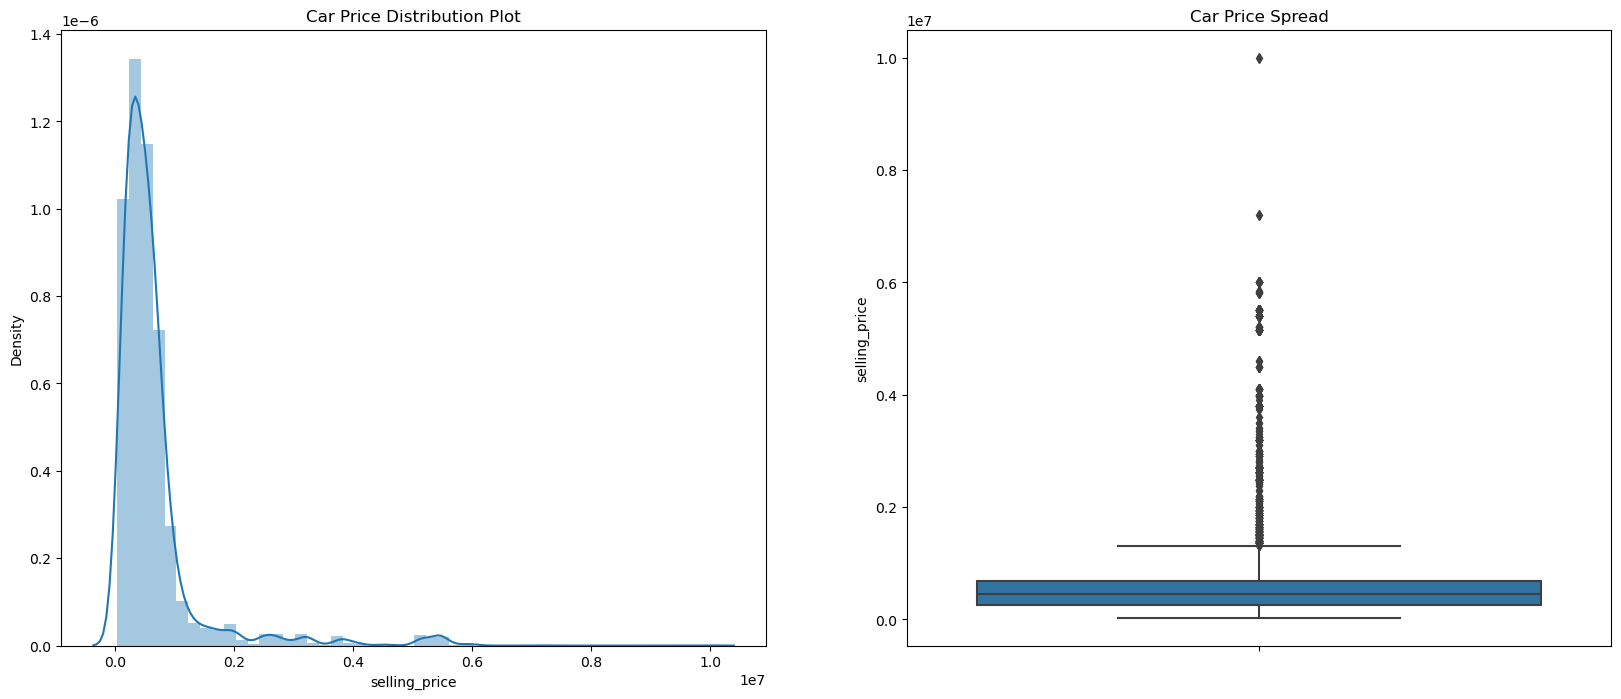

In [16]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df['selling_price'])

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df['selling_price'])

plt.show()

## 2.3 Feature Year

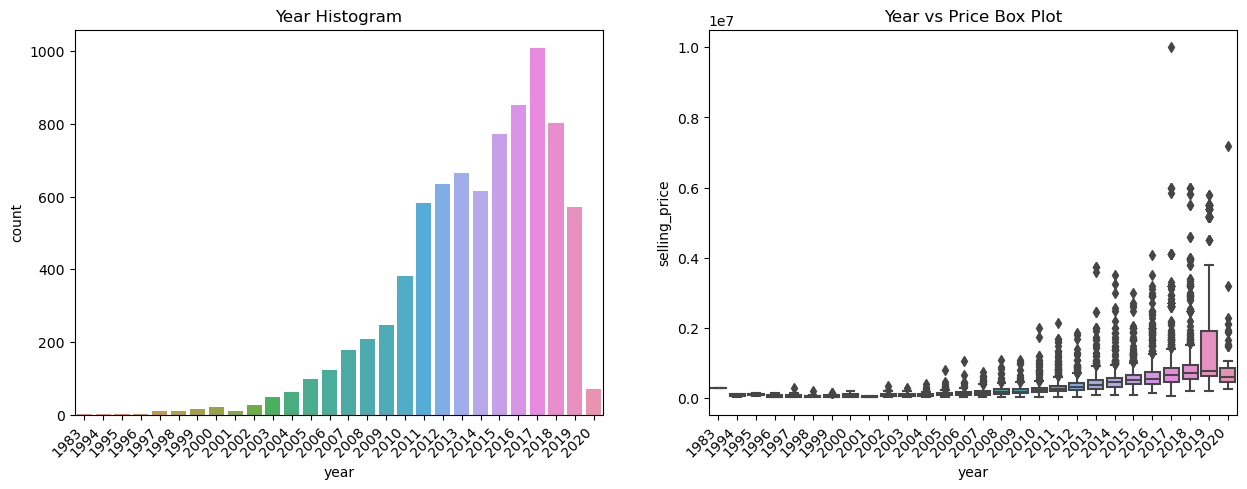

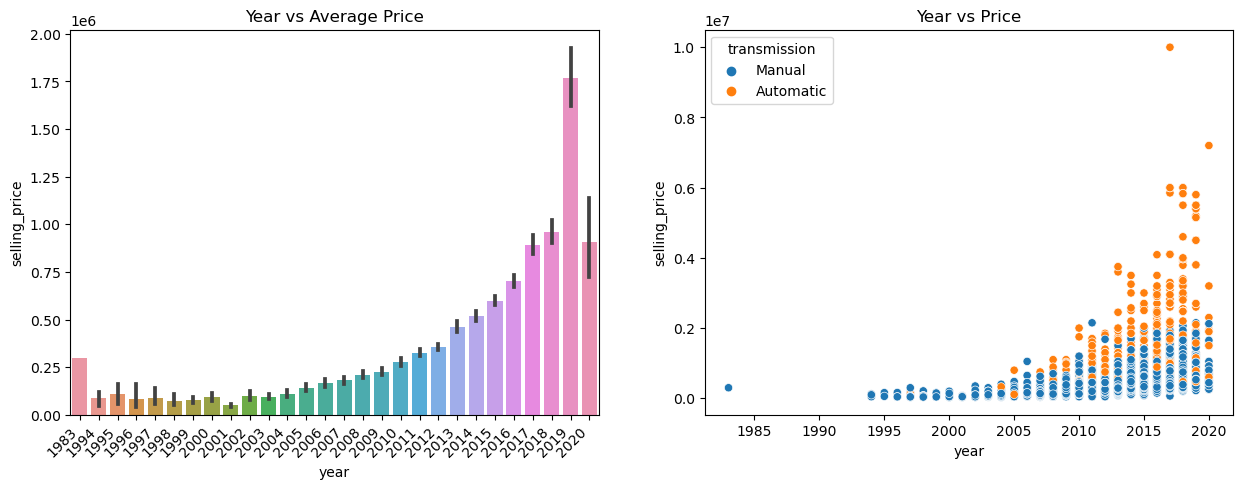

In [17]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Year Histogram')
count_plot= sns.countplot(data = df, x = 'year')
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplot(1,2,2)
plt.title('Year vs Price Box Plot')
barplot = sns.boxplot(x = df['year'], y = df['selling_price'])
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
None #don't show the label objects

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Year vs Average Price')
barplot = sns.barplot(x = df['year'], y = df['selling_price'], estimator=np.average)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
None #don't show the label objects

plt.subplot(1,2,2)
plt.title('Year vs Price')
scatterplot = sns.scatterplot(x = df['year'], y = df['selling_price'], hue = df['transmission'])

## 2.4 Feature Brand

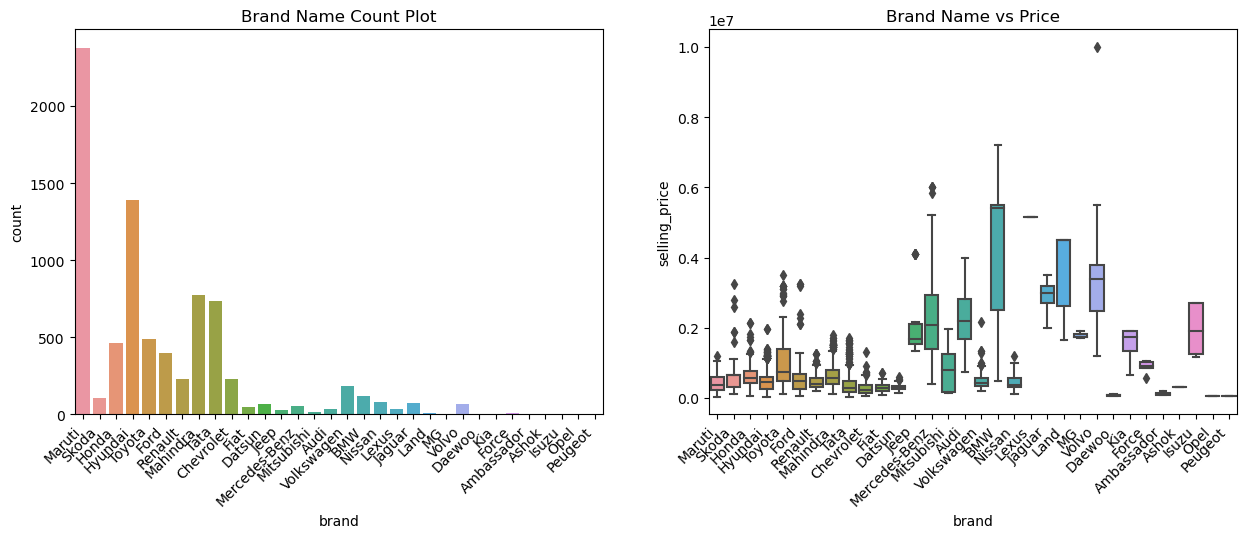

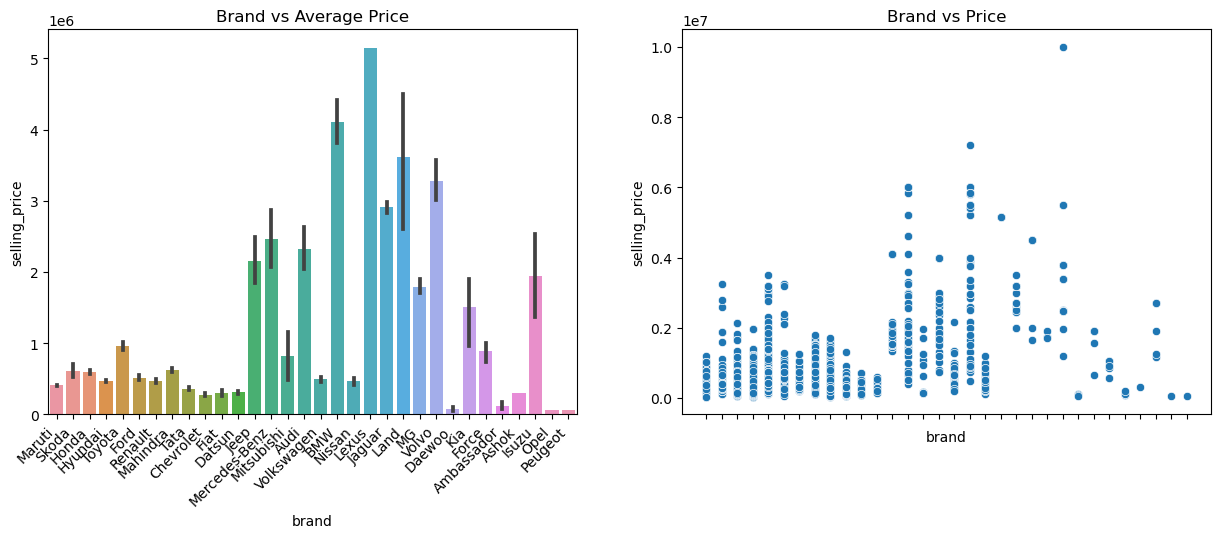

In [18]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Brand Name Count Plot')
count_plot= sns.countplot(data = df, x = 'brand')
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplot(1,2,2)
plt.title('Brand Name vs Price')
barplot = sns.boxplot(x = df['brand'], y = df['selling_price'])
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
None #don't show the label objects

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Brand vs Average Price')
barplot = sns.barplot(x = df['brand'], y = df['selling_price'], estimator=np.average)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
None #don't show the label objects

plt.subplot(1,2,2)
plt.title('Brand vs Price')
scatterplot = sns.scatterplot(x = df['brand'], y = df['selling_price'])
scatterplot.set_xticklabels(scatterplot.get_xticklabels(), rotation=45, horizontalalignment='right')
None #don't show the label objects

## 2.5 Feature KM Driven

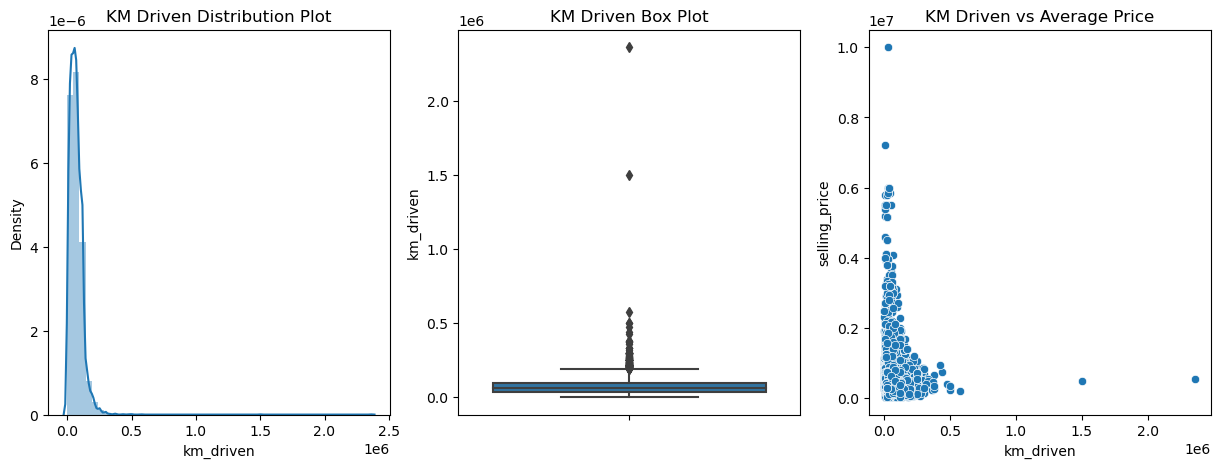

In [19]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('KM Driven Distribution Plot')
sns.distplot(df.km_driven)

plt.subplot(1,3,2)
plt.title('KM Driven Box Plot')
sns.boxplot(y=df.km_driven)

plt.subplot(1,3,3)
plt.title('KM Driven vs Average Price')
scatterplot = sns.scatterplot(x = df['km_driven'], y = df['selling_price'])

plt.show()


## 2.6 Feature Fuel

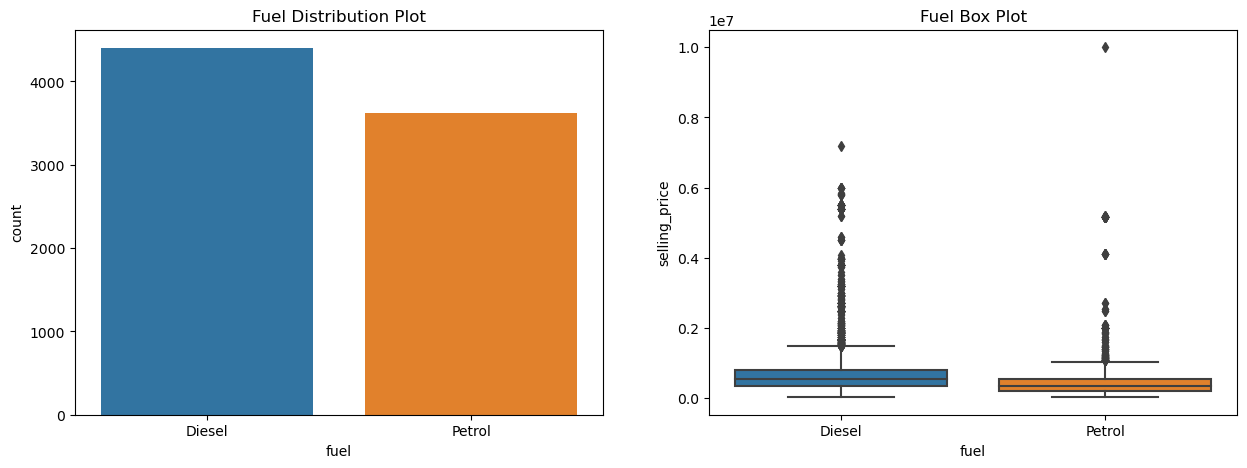

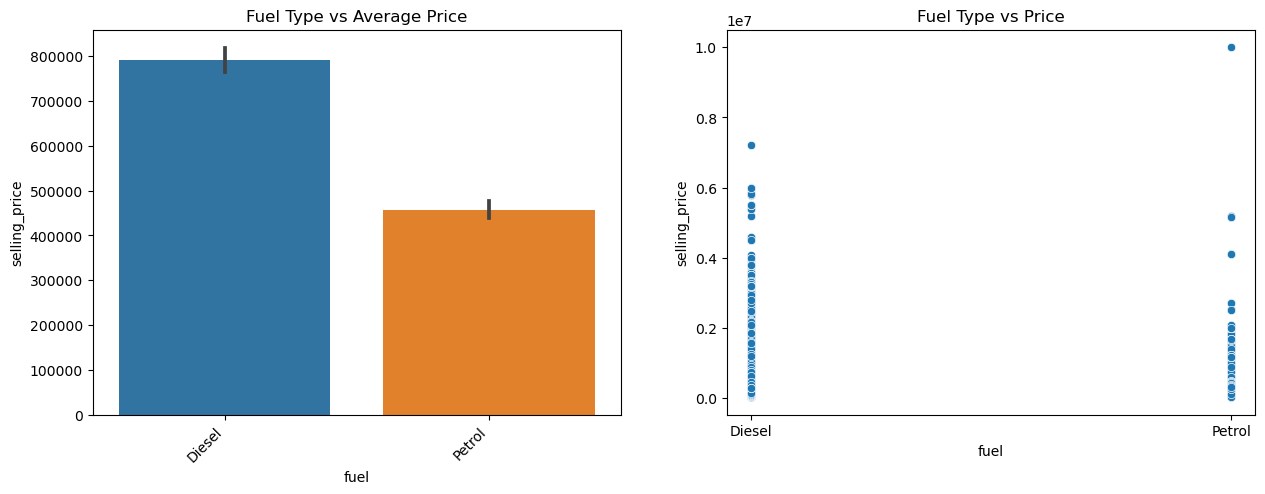

In [20]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Fuel Distribution Plot')
count_plot= sns.countplot(data = df, x = 'fuel')

plt.subplot(1,2,2)
plt.title('Fuel Box Plot')
sns.boxplot(x = df['fuel'], y = df['selling_price'])

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Fuel Type vs Average Price')
barplot = sns.barplot(x = df['fuel'], y = df['selling_price'], estimator=np.average)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
None #don't show the label objects

plt.subplot(1,2,2)
plt.title('Fuel Type vs Price')
scatterplot = sns.scatterplot(x = df['fuel'], y = df['selling_price'])

## 2.7 Feature Seller Type

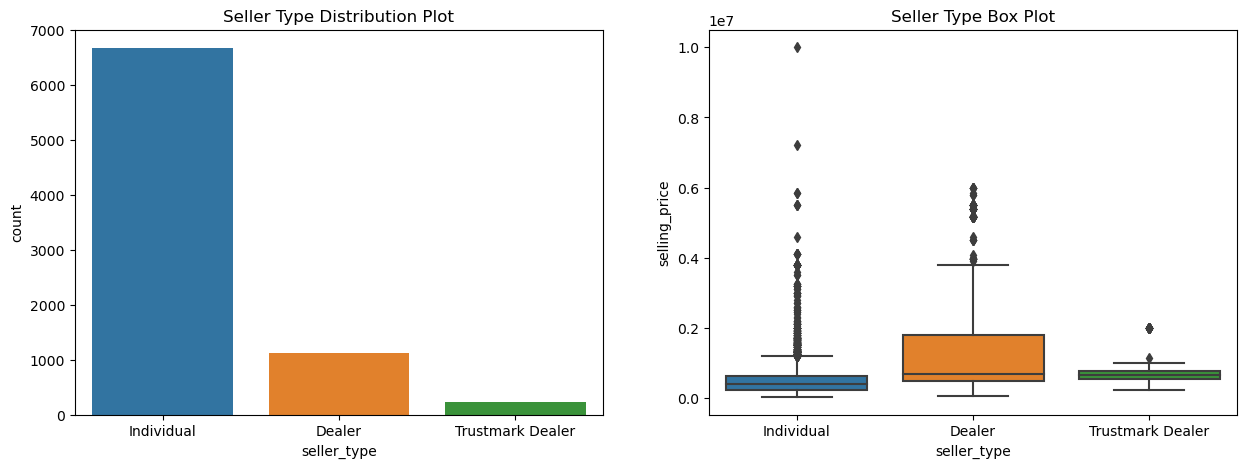

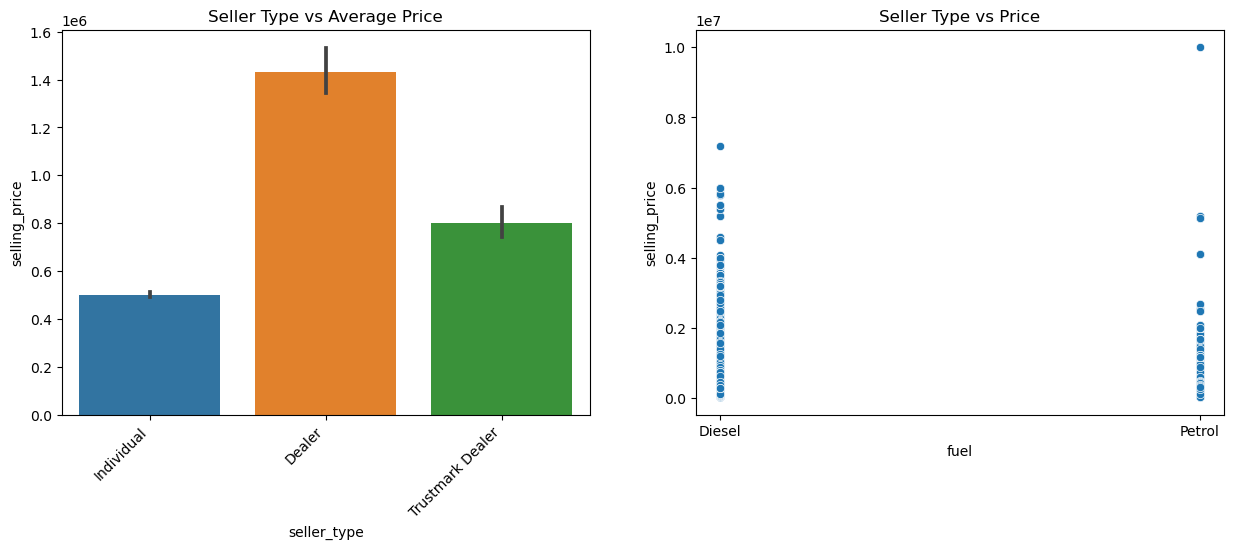

In [21]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Seller Type Distribution Plot')
count_plot= sns.countplot(data = df, x = 'seller_type')

plt.subplot(1,2,2)
plt.title('Seller Type Box Plot')
sns.boxplot(x = df['seller_type'], y = df['selling_price'])

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Seller Type vs Average Price')
barplot = sns.barplot(x = df['seller_type'], y = df['selling_price'], estimator=np.average)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
None #don't show the label objects

plt.subplot(1,2,2)
plt.title('Seller Type vs Price')
scatterplot = sns.scatterplot(x = df['fuel'], y = df['selling_price'])

## 2.8 Feature Transmission

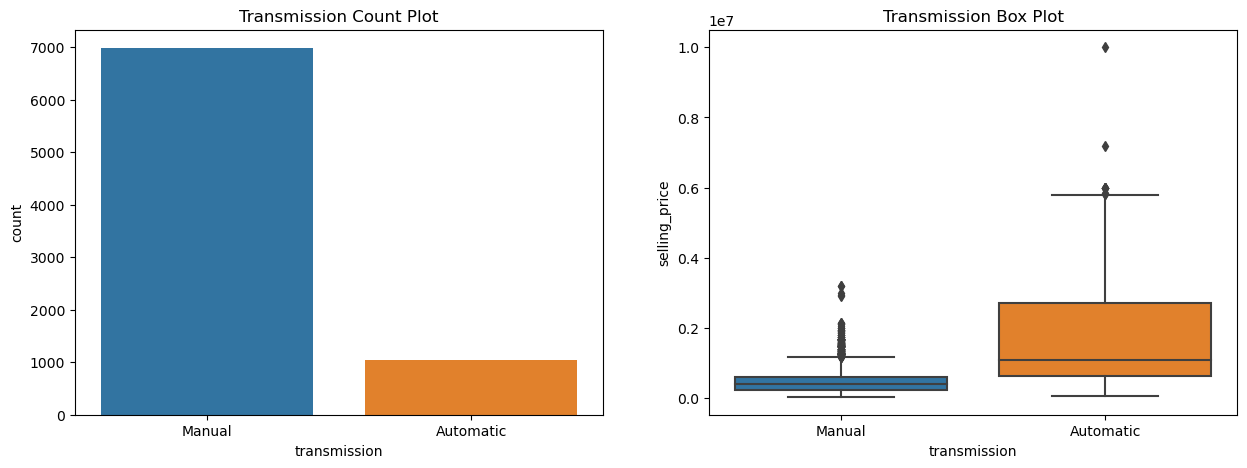

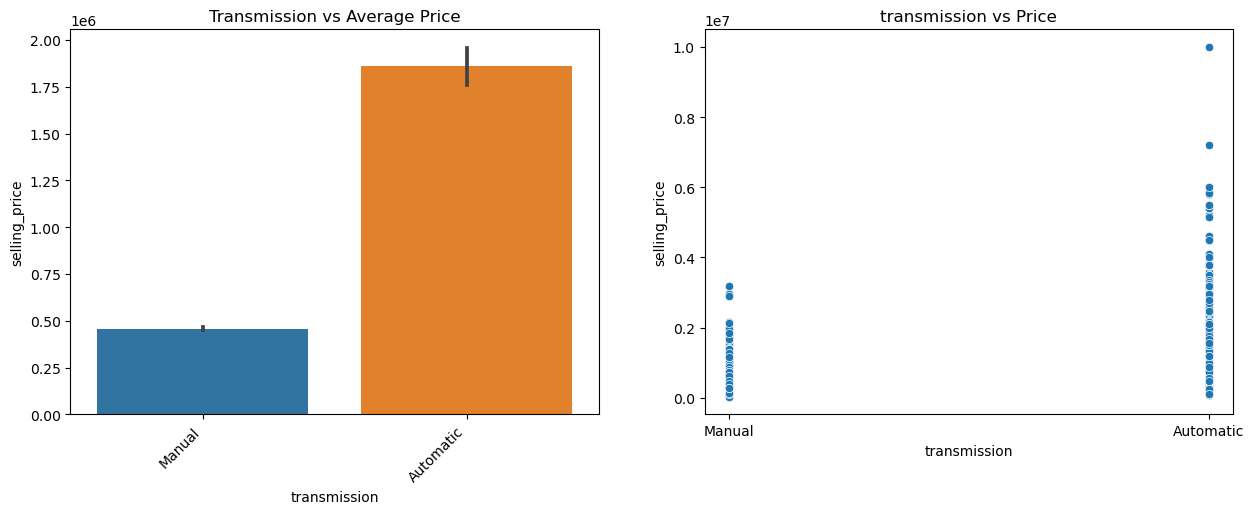

In [22]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Transmission Count Plot')
count_plot= sns.countplot(data = df, x = 'transmission')

plt.subplot(1,2,2)
plt.title('Transmission Box Plot')
sns.boxplot(x = df['transmission'], y = df['selling_price'])

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.title('Transmission vs Average Price')
barplot = sns.barplot(x = df['transmission'], y = df['selling_price'], estimator=np.average)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
None #don't show the label objects

plt.subplot(1,2,2)
plt.title('transmission vs Price')
scatterplot = sns.scatterplot(x = df['transmission'], y = df['selling_price'])

## 2.9 Feature Owner

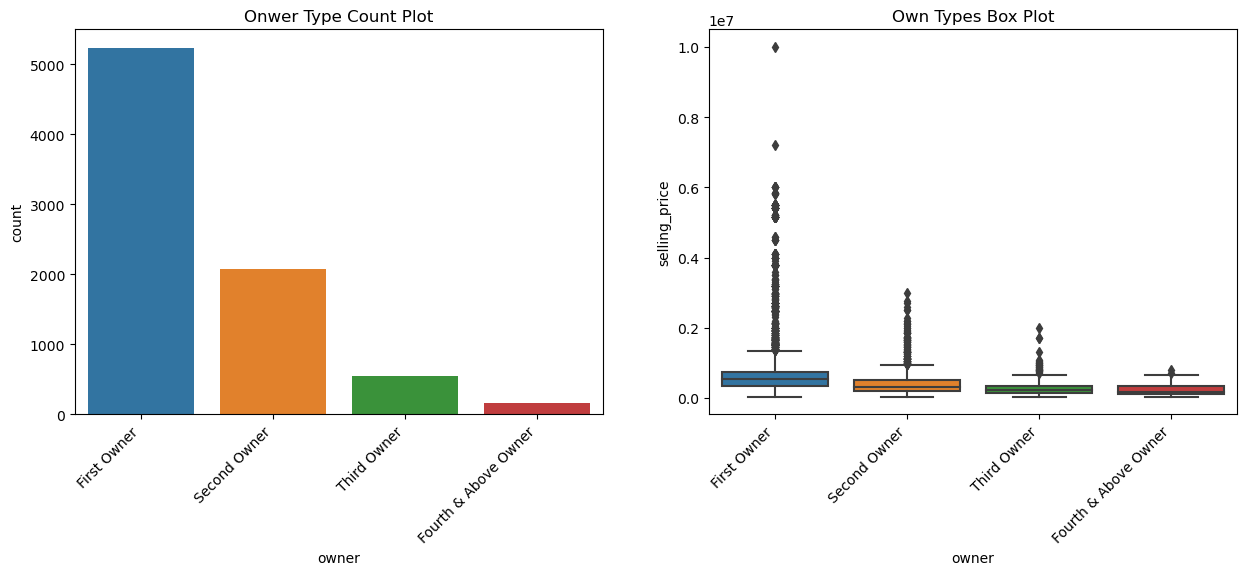

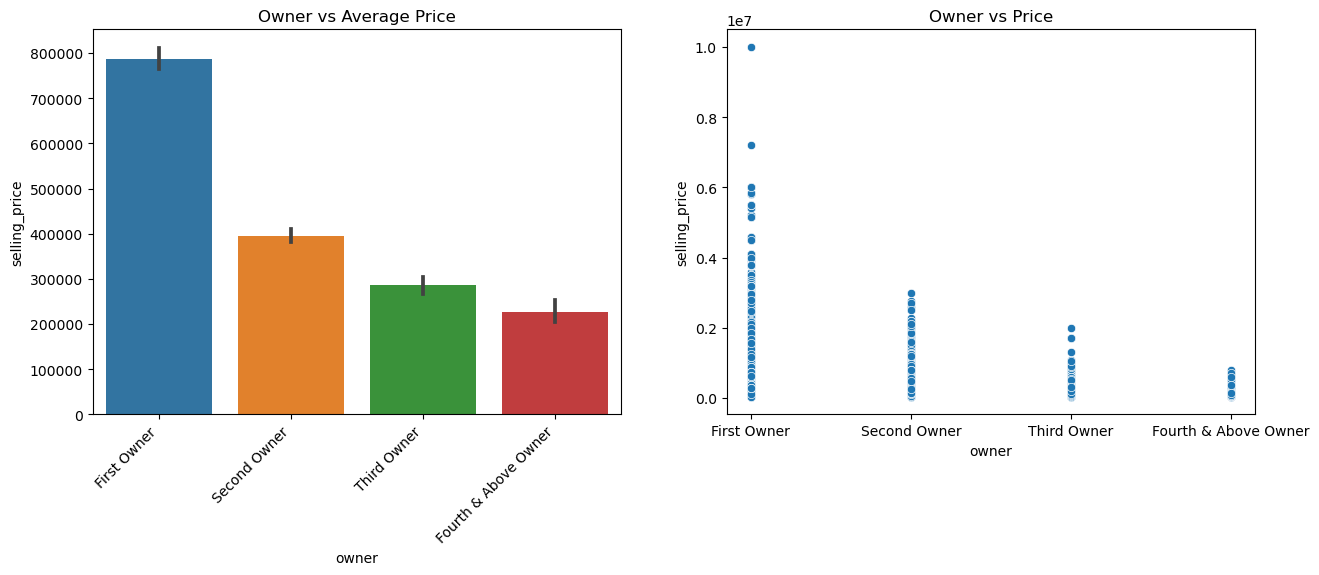

In [23]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Onwer Type Count Plot')
count_plot= sns.countplot(data = df, x = 'owner')
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplot(1,2,2)
plt.title('Own Types Box Plot')
boxplot = sns.boxplot(x = df['owner'], y = df['selling_price'])
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.title('Owner vs Average Price')
barplot = sns.barplot(x = df['owner'], y = df['selling_price'], estimator=np.average)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
None #don't show the label objects

plt.subplot(1,2,2)
plt.title('Owner vs Price')
scatterplot = sns.scatterplot(x = df['owner'], y = df['selling_price'])

## 2.10 Feature Mileage

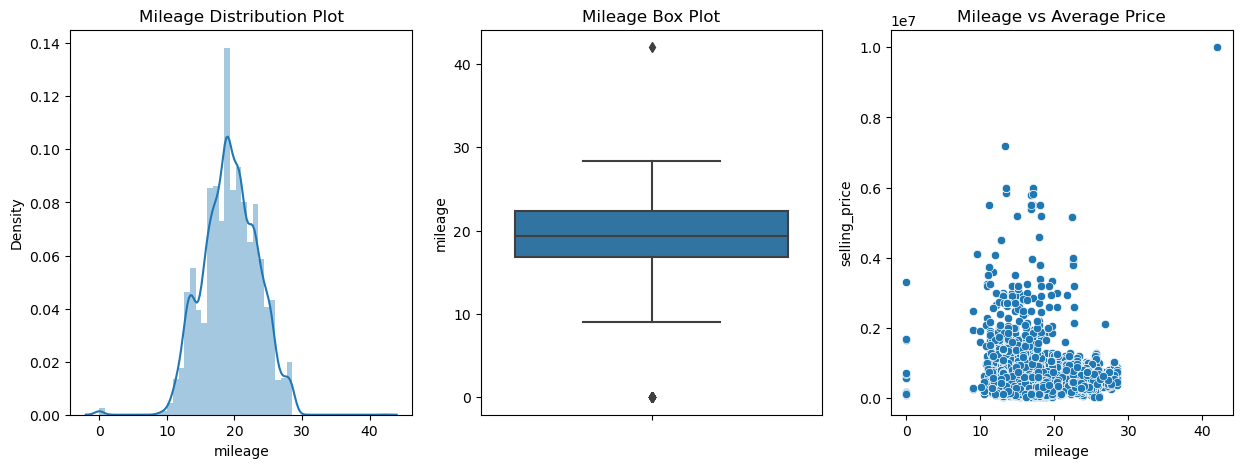

In [24]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Mileage Distribution Plot')
sns.distplot(df['mileage'])

plt.subplot(1,3,2)
plt.title('Mileage Box Plot')
sns.boxplot(y=df['mileage'])

plt.subplot(1,3,3)
plt.title('Mileage vs Average Price')
scatterplot = sns.scatterplot(x = df['mileage'], y = df['selling_price'])

plt.show()

## 2.11 Feature Engine

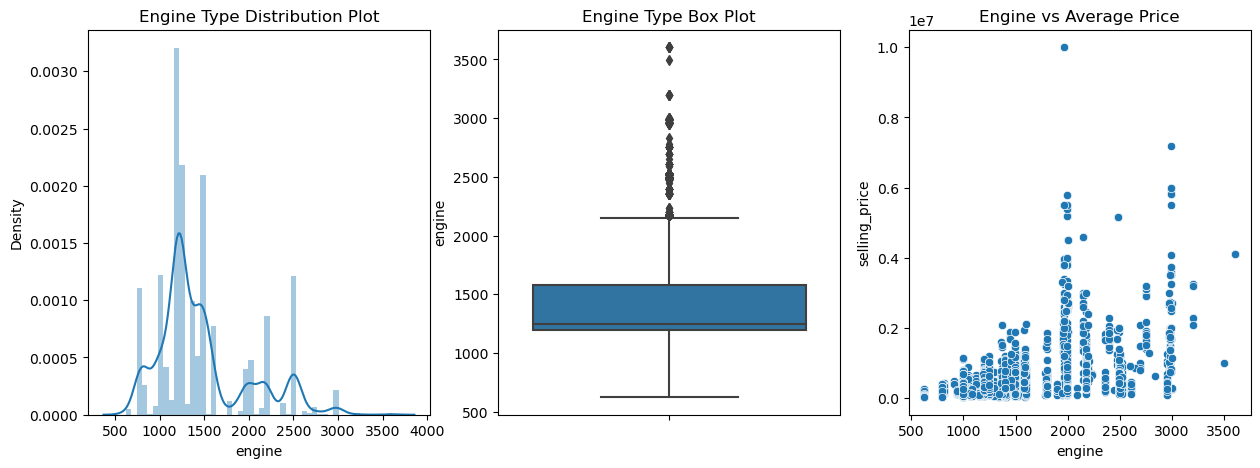

In [25]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Engine Type Distribution Plot')
sns.distplot(df['engine'])

plt.subplot(1,3,2)
plt.title('Engine Type Box Plot')
sns.boxplot(y=df['engine'])

plt.subplot(1,3,3)
plt.title('Engine vs Average Price')
scatterplot = sns.scatterplot(x = df['engine'], y = df['selling_price'])

plt.show()

## 2.12 Feature Max Power

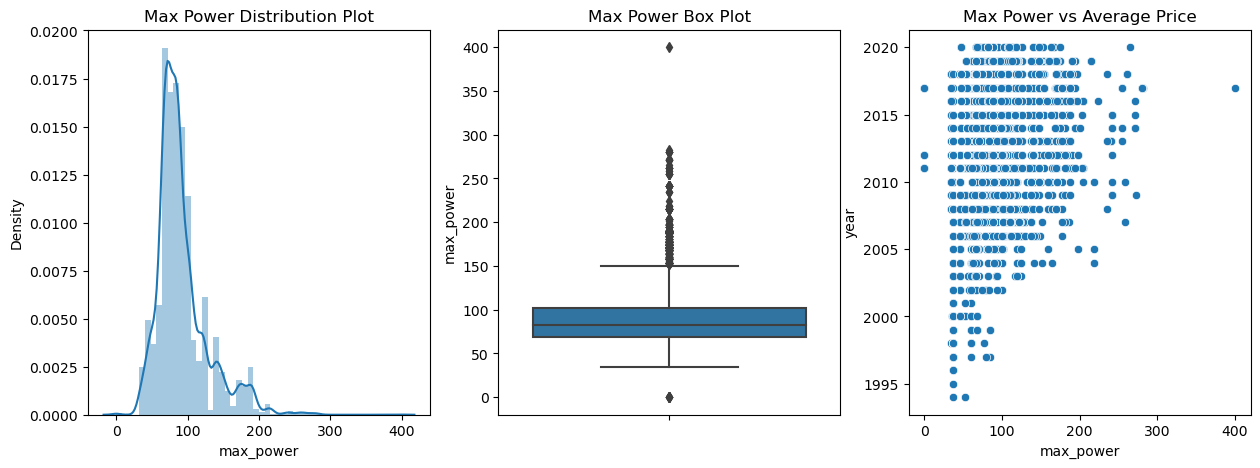

In [26]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Max Power Distribution Plot')
sns.distplot(df['max_power'])

plt.subplot(1,3,2)
plt.title('Max Power Box Plot')
sns.boxplot(y=df['max_power'])

plt.subplot(1,3,3)
plt.title('Max Power vs Average Price')
scatterplot = sns.scatterplot(x = df['max_power'], y = df['year'])

plt.show()

## 2.13 Feature Seat

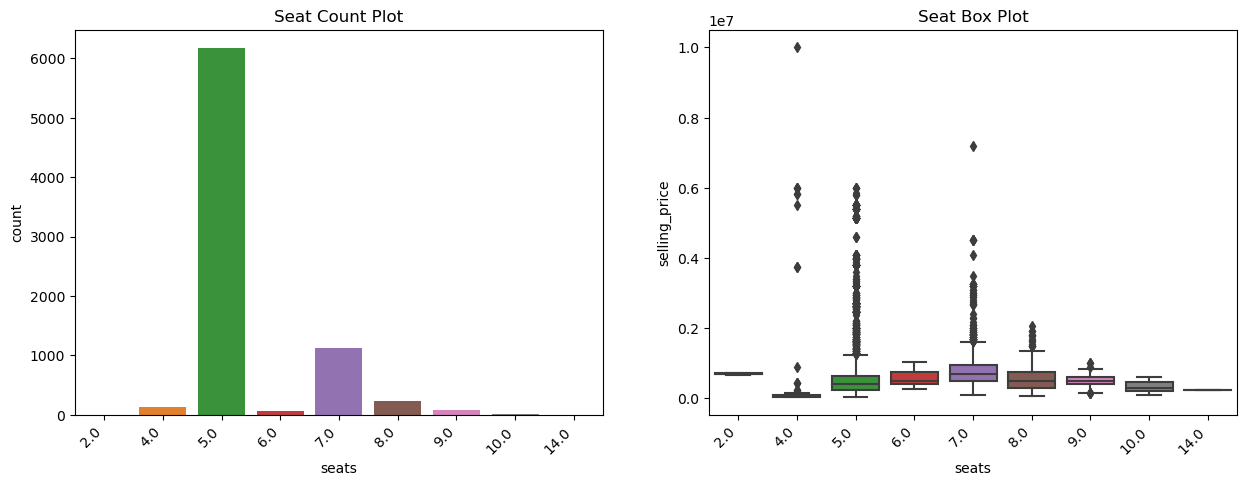

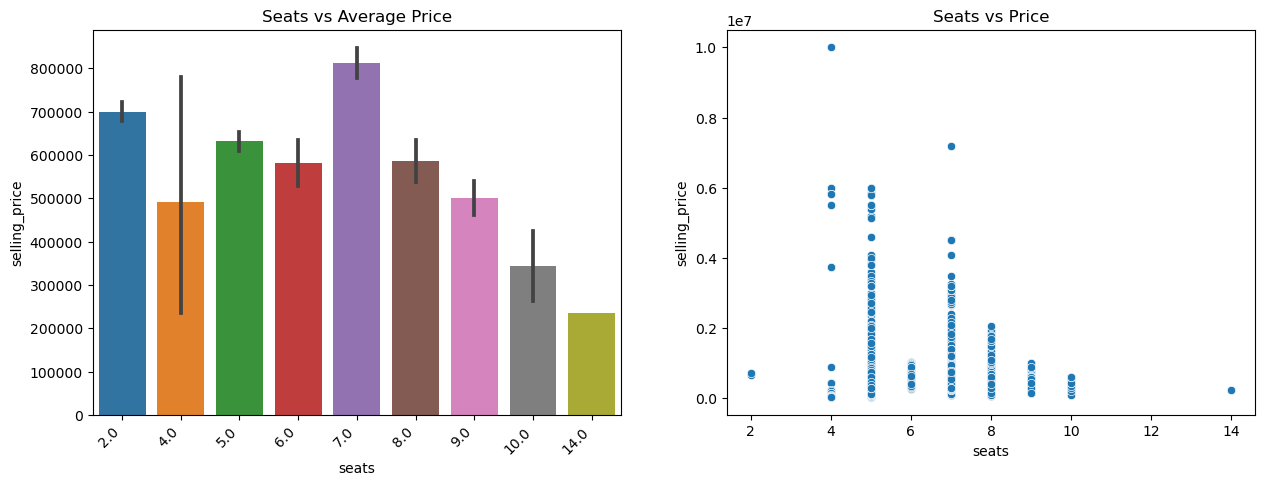

In [27]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Seat Count Plot')
count_plot= sns.countplot(data = df, x = 'seats')
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplot(1,2,2)
plt.title('Seat Box Plot')
boxplot = sns.boxplot(x = df['seats'], y = df['selling_price'])
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.title('Seats vs Average Price')
barplot = sns.barplot(x = df['seats'], y = df['selling_price'], estimator=np.average)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
None #don't show the label objects

plt.subplot(1,2,2)
plt.title('Seats vs Price')
scatterplot = sns.scatterplot(x = df['seats'], y = df['selling_price'])

## 2.14 Label Encoding

### In this section, I will encode all categorical data.
- brand
- fuel
- seller_type
- transmission
- owner

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

brand_le = LabelEncoder()
df["brand"] = brand_le.fit_transform(df["brand"])

In [29]:
le = LabelEncoder()
df["fuel"] = le.fit_transform(df["fuel"])

In [30]:
le = LabelEncoder()
df["seller_type"] = le.fit_transform(df["seller_type"])

In [31]:
le = LabelEncoder()
df["transmission"] = le.fit_transform(df["transmission"])

In [32]:
owner_le = LabelEncoder()
df["owner"] = owner_le.fit_transform(df["owner"])

In [33]:
owner_le.classes_

array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
       'Third Owner'], dtype=object)

In [34]:
# check the encoded data.
df.head(5)

,year,selling_price,brand,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,20,145500,0,1,1,0,23.40,1248.0,74.00,5.0
1,2014,370000,27,120000,0,1,1,2,21.14,1498.0,103.52,5.0
2,2006,158000,10,140000,1,1,1,3,17.70,1497.0,78.00,5.0
3,2010,225000,11,127000,0,1,1,0,23.00,1396.0,90.00,5.0
4,2007,130000,20,120000,1,1,1,0,16.10,1298.0,88.20,5.0


In [35]:
df.shape

(8028, 12)

## 2.15 Correlation Graph

- In this section, I will use heatmap to check the correlation between features to avoid using the features with strong correlations.

<AxesSubplot:>

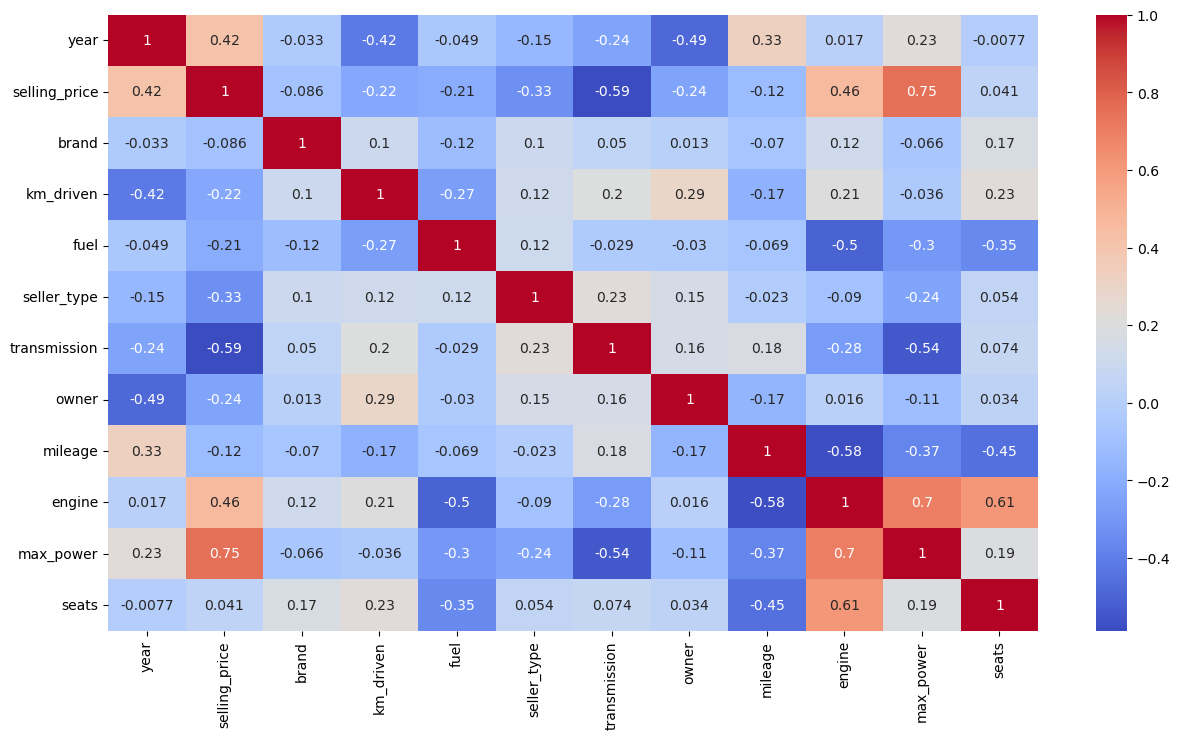

In [36]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

### Correlation Analysis
- Engine and max power have strong correlation.
- Engine and seat also have strong correlation.
- Therefore, we should drop the Engine Column.

## Check Predictive Power Score
- I use PPS scores to select some features to train the model.

<AxesSubplot:xlabel='x', ylabel='y'>

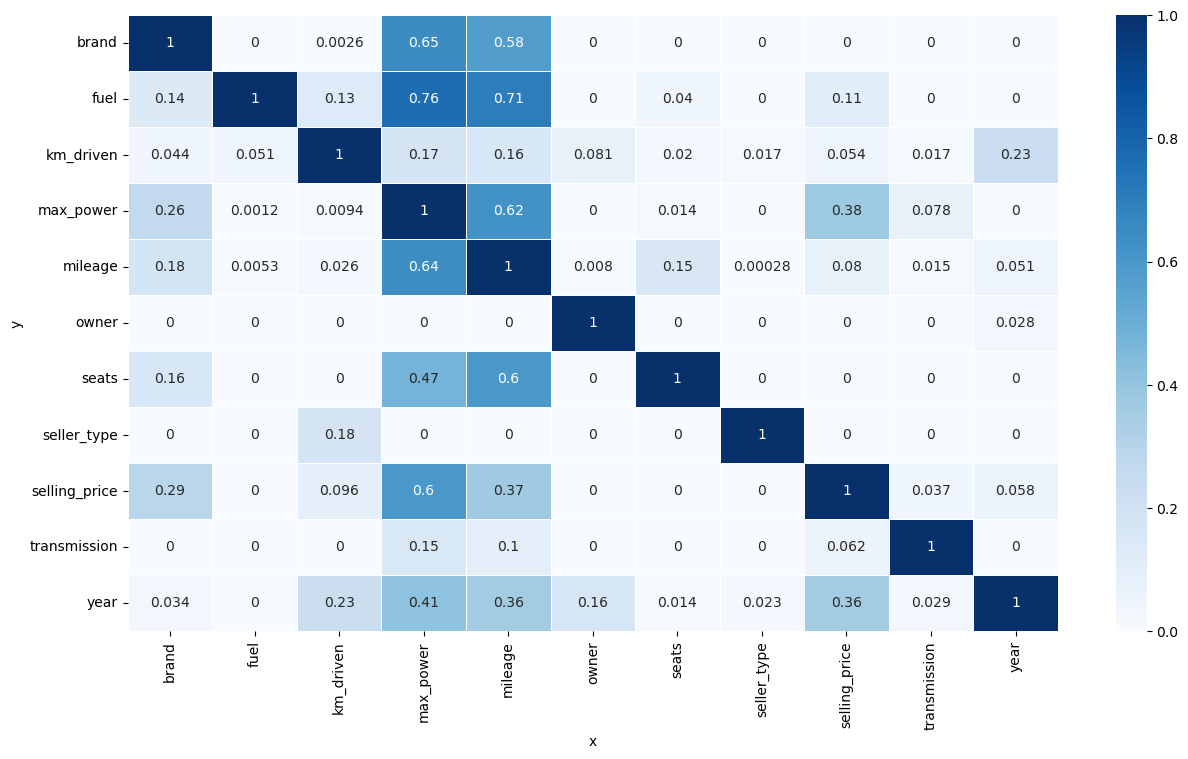

In [37]:
import ppscore as pps

# before using pps, let's drop country and year
dfcopy = df.copy()
dfcopy.drop(['engine'], axis='columns', inplace=True)

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

# 4. Feature Selection

Top Features according to PPS
- max_power
- mileage
- brand

Features from EDA
- year

In [38]:
#x is our strong features
X = df[ ['max_power', 'mileage', 'year', 'brand'] ]

#y is simply the life expectancy col
y = df['selling_price']

### Split the dataset into training and testing sets.

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# 5. Preprocessing

## 5.1 Null Values

In [40]:
#check for null values of training dataset.
X_train[['max_power', 'mileage', 'year', 'brand']].isna().sum()

max_power    149
mileage      154
year           0
brand          0
dtype: int64

In [41]:
#check for null values of training dataset.
X_test[['max_power', 'mileage', 'year', 'brand']].isna().sum()

max_power    59
mileage      60
year          0
brand         0
dtype: int64

In [42]:
y_train.isna().sum()

0

In [43]:
y_test.isna().sum()

0

<AxesSubplot:title={'center':'Mileage Distribution Plot'}, xlabel='mileage', ylabel='Density'>

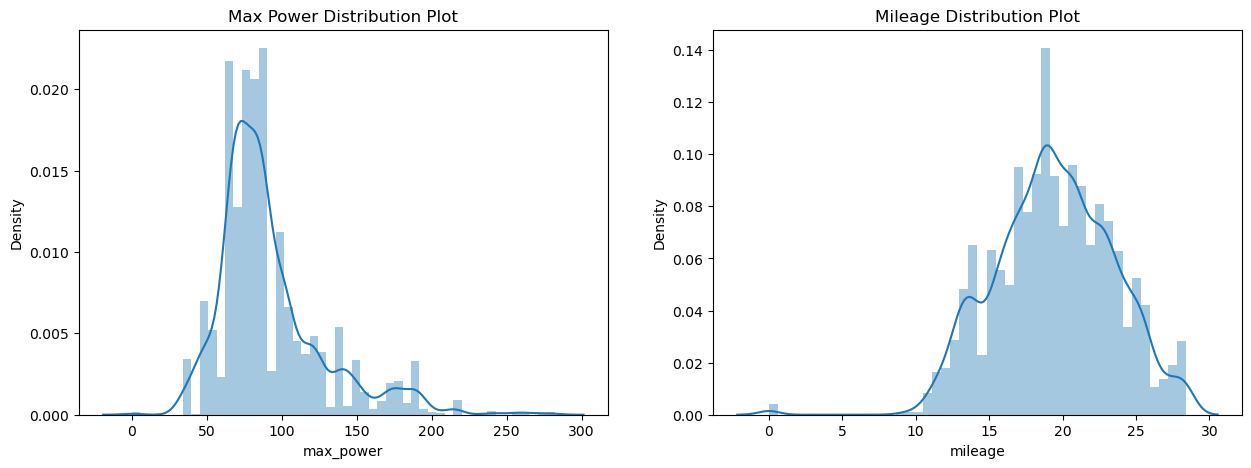

In [44]:
# Check the distribution of max_power and mileage to replace missing values.
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Max Power Distribution Plot')
sns.distplot(X_train['max_power'])

plt.subplot(1,2,2)
plt.title('Mileage Distribution Plot')
sns.distplot(X_train['mileage'])

In [45]:
X_train[['max_power', 'mileage']].describe()

,max_power,mileage
count,5470.000000,5465.000000
mean,92.049350,19.416893
std,35.866965,4.018603
min,0.000000,0.000000
25%,68.070000,16.800000
50%,82.400000,19.330000
75%,103.200000,22.320000
max,282.000000,28.400000


## 5.2 Replacing missing data
- Since Both features is roughly follow normal distribution, so I will use mean value to replace missing values of both features.
- There is no missing data in brand and year features.

In [46]:
# Before replacing missing value. 
# I will save mean and mode data as default values for deployment 
# in case users doesn't have values for all features.

default_values = {
    'max_power': X_train['max_power'].mean(),
    'mileage': X_train['mileage'].mean(),
    'year': X_train['year'].mode()[0],
    'brand': X_train['brand'].mode()[0]
}

In [47]:
X_train['max_power'].fillna(X_train['max_power'].mean(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [48]:
X_test['max_power'].fillna(X_train['max_power'].mean(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [49]:
# check for null values of training dataset again.
X_train[['max_power', 'mileage', 'year', 'brand']].isna().sum()

max_power    0
mileage      0
year         0
brand        0
dtype: int64

In [50]:
#check for null values of training dataset again.
X_test[['max_power', 'mileage', 'year', 'brand']].isna().sum()

max_power    0
mileage      0
year         0
brand        0
dtype: int64

## 5.3 Checking Outliers

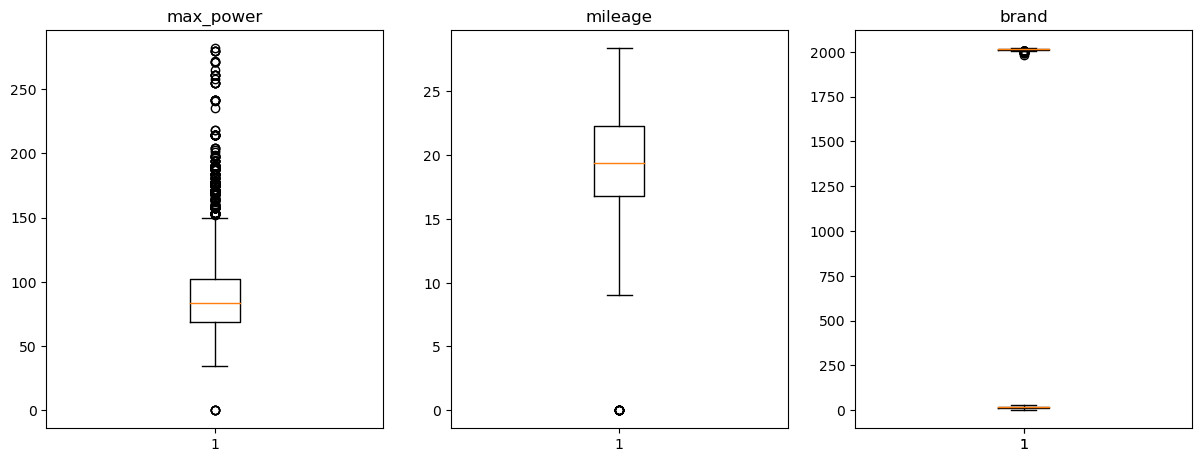

In [51]:
# Create a dictionary of columns.
col_dict = {'max_power':1,'mileage':2,'year':3,'brand':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
    plt.subplot(5,4,i)
    plt.boxplot(X_train[variable])
    plt.title(variable)

plt.show()

In [52]:
# X_train = X_train[['max_power', 'mileage', 'brand']]
# X_test = X_test[['max_power', 'mileage', 'brand']]

In [53]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [54]:
for col in X_train.columns:
    outlier_count(col)


---------------max_power---------------

Number of outliers: 409
Percent of data that is outlier: 7.28%

---------------mileage---------------

Number of outliers: 14
Percent of data that is outlier: 0.25%

---------------year---------------

Number of outliers: 145
Percent of data that is outlier: 2.58%


### Outlier Analysis
Even though there are a lot of outliers, I will not remove them since there is not enough time to inspect each outlier and I don't want to bindly remove all outliers.

## 5.4 Scaling
In this section
- I will use standardization to convert numerical values into similar range to make the training more efficient.

In [55]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
num_features = ['max_power', 'mileage', 'year'];
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features]  = scaler.transform(X_test[num_features])

# also need to scale y here.

In [56]:
X_train

,max_power,mileage,year,brand
6853,-0.555302,-1.472926,0.284563,4
1495,-0.846386,-0.872338,-0.215581,19
7904,-0.092959,0.341453,-0.215581,20
1281,-0.057916,-0.155671,-0.965798,28
1421,-0.057916,0.904188,-0.965798,11
...,...,...,...,...
5293,-0.371608,0.237991,-0.215581,11
5461,-0.706778,0.275843,0.534636,20
865,-0.092959,0.341453,0.284563,20
7701,3.462221,0.745209,1.284852,17


#### 'selling_price' is a big number. Therefore, I will scale them using np.log function.

In [57]:
# Also scale the label
y_train = np.log(y_train)
y_test = np.log(y_test)
y_train

6853    12.980800
1495    12.899220
7904    13.122363
1281    12.154779
1421    12.278393
          ...    
5293    12.611538
5461    12.847927
865     13.527828
7701    15.454507
7366    13.560618
Name: selling_price, Length: 5619, dtype: float64

In [58]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 4)
Shape of X_test:  (2409, 4)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


# 6. Modeling

In [59]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.metrics import mean_squared_error, r2_score

# I will use linear regression first.
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)
# yhat = np.exp(yhat)

print("MSE: ", mean_squared_error(y_test,  yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  0.11410633611605951
r2:  0.8378219574434133


## Cross Validation and GridSearch

In [60]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation

# models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [61]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []


#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.12329393 -0.11251787 -0.11878586 -0.11957663 -0.11827291]; Mean: -0.11848944121769563
SVR - Score: [-0.10360621 -0.10210804 -0.10401411 -0.10963519 -0.09805061]; Mean: -0.1034828319877041
KNeighbors Regressor - Score: [-0.05511014 -0.0497027  -0.05765845 -0.05823345 -0.0568014 ]; Mean: -0.05550122579534278
Decision-Tree Regressor - Score: [-0.0683598  -0.06659165 -0.06098873 -0.06690195 -0.06817272]; Mean: -0.06620296972700185
Random-Forest Regressor - Score: [-0.04887498 -0.05764057 -0.053626   -0.0548853  -0.05784612]; Mean: -0.05457459390326689


## Grid Search

In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

In [63]:
yhat = grid.predict(X_test)

print("MSE: ", mean_squared_error(y_test,  yhat))
print("r2: ", r2_score(y_test, yhat))

np.exp(yhat)

MSE:  0.05025267305676519
r2:  0.9285764452090293


array([209580.72726802, 955755.55330137, 356854.45825531, ...,
       140491.57137934, 780517.65939894, 295134.47678409])

# 8. Analysis Feature Importance

In [64]:
#stored in this variable
#note that grid here is random forest
rf = grid.best_estimator_

rf.feature_importances_

array([0.45402349, 0.04262238, 0.47297737, 0.03037676])

Text(0.5, 0, 'Random Forest Feature Importance')

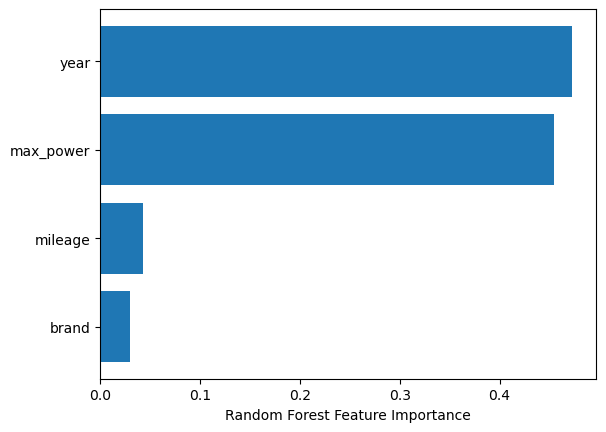

In [65]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# 9. Inference

## Save the model

In [66]:
import pickle

model_and_scaler = {
    'model': grid,
    'scaler': scaler,
    'brand_le': brand_le,
    'default_values': default_values
}

file = open('car_prediction.model', 'wb')
pickle.dump(model_and_scaler, file)

In [67]:
default_values

{'max_power': 92.04935009140627,
 'mileage': 19.416892955169274,
 'year': 2017,
 'brand': 20}

## Load the Model and Make Inference with unknown data.

In [68]:
# Get a sample from the orinal dataset.
sample = df[['max_power', 'mileage', 'year', 'brand', 'selling_price']].loc[1]
sample

max_power           103.52
mileage              21.14
year               2014.00
brand                27.00
selling_price    370000.00
Name: 1, dtype: float64

In [69]:
# Load Model
model_file = open('car_prediction.model', 'rb');
load_model = pickle.load(model_file)
model = load_model['model']
scaler = load_model['scaler']
brand_le = load_model['brand_le']

In [70]:
brand_le.inverse_transform([27])

array(['Skoda'], dtype=object)

In [71]:
# change some value accroding to the real value and check the result.
brand_sample = brand_le.transform(['Skoda'])
sample = np.array([[90, 20, 2017, brand_sample[0]]])
print(sample)
sample[:, 0: 3] = scaler.transform(sample[:, 0: 3])
sample

[[  90   20 2017   27]]


array([[ 0,  0,  0, 27]])

In [72]:
# predict the selling_price
yhat = model.predict(sample)

# use exp function to get the real price. 
np.exp(yhat)

array([342567.52232009])

# Assignment Report

In this assignment, I analyze dataset, select important features, select the model and train it. First, I analyze each feature using distribution plots, count plots and scatter plots. There are several possible features among them. I chose year, max_power, mileage and brand as input features. <br/>

According to the count plot and scatter plot, the selling prices of newer cars is generally higher than the older ones. It is also logical that people would pay more for newer cars in normal situations. In addition, I also chose 'brand' as one of the predictor in this project because there are brands which are sold in higher price than other brands. Finally, I chose 'engine' and 'mileage' features according to their predictive power scores.

Then, I tried to find the best algorithm by using cross validation among the popular  algorithms: 'Linear Regression', 'SVR', 'KNeighbors Regressor', 'Decision Tree Regressor', 'Random Forest Regressor'. Among them 'Random Forest Regressor' indicate the best performance. On the other hand, linear regression is the worst algorithm among them. The reason might be the fact that Linear regression assumes linear relationships, inadequate for complex car price determinants. Random forest captures nonlinearity, interactions, and feature importance, yielding better predictive power.

After the training, the feature important analysis shows that 'year' and 'max_power' show the most significant one compared to 'mileage' and 'brand' feature. 'Year' and 'max_power' are likely most significant due to their direct impact on car value, while 'mileage' and 'brand' contribute less directly. 